<a href="https://colab.research.google.com/github/antonschneider90/production-errors/blob/master/Anton_Tracking_Production_Errors_Altair_and_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import altair as alt
from altair import Chart
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [0]:
APM_data = pd.read_csv('https://raw.githubusercontent.com/antonschneider90/dataviz/master/APM2.csv')

In [0]:
APM_data.head()

,Build,Station,Monitor_Name,Factory_Time,Units_Inspected,Units_Flagged
0,DVT,Station A,Bent Spring,9/30/19,893,4
1,DVT,Station A,Bent Spring,10/1/19,1342,14
2,DVT,Station A,Bent Spring,10/2/19,505,12
3,DVT,Station A,Bent Spring,10/3/19,853,1
4,DVT,Station A,Bent Spring,10/4/19,1167,7


In [0]:
Def_Rate = APM_data['Units_Flagged']/APM_data['Units_Inspected']

In [0]:
APM_data['Def_Rate'] = Def_Rate
APM_data.head()

,Build,Station,Monitor_Name,Factory_Time,Units_Inspected,Units_Flagged,Def_Rate
0,DVT,Station A,Bent Spring,9/30/19,893,4,0.004479
1,DVT,Station A,Bent Spring,10/1/19,1342,14,0.010432
2,DVT,Station A,Bent Spring,10/2/19,505,12,0.023762
3,DVT,Station A,Bent Spring,10/3/19,853,1,0.001172
4,DVT,Station A,Bent Spring,10/4/19,1167,7,0.005998


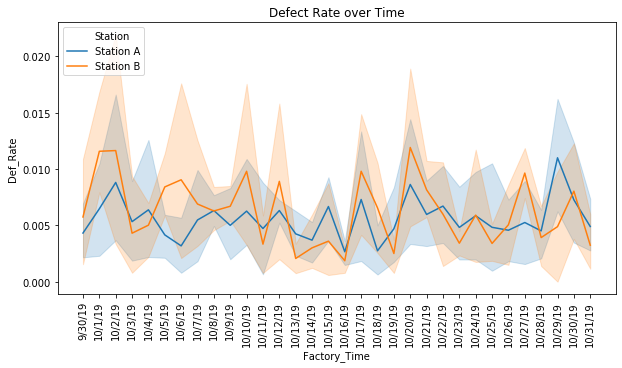

In [0]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Factory_Time', y='Def_Rate', hue='Station', sort=False, data=APM_data)
plt.title('Defect Rate over Time')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [0]:
sort = alt.SortField(field='Factory_Time', order='descending')
alt.Chart(APM_data).mark_bar().encode(
    x=alt.X('Factory_Time:O', sort=sort),
    y=alt.Y('Def_Rate:Q')
).properties(
    title='Defect Rate over Time'
)


alt.Chart(...)

In [0]:
brush = alt.selection(type='interval')

sort = alt.SortField(field='Factory_Time', order='descending')

def_time = Chart(APM_data).mark_point().encode(
    x=alt.X('Factory_Time:N', sort=sort),
    y='Def_Rate:Q'

).properties(
    title='Defect Rates over Time'
).add_selection(brush)

def_mon = Chart(APM_data).mark_point().encode(
    x=alt.X('Monitor_Name:N'),
    y='Def_Rate:Q'
).properties(
    title='Monitor Indication for selected Defect Rates'
).transform_filter(
    brush
)

def_time | def_mon

alt.HConcatChart(...)

No handles with labels found to put in legend.


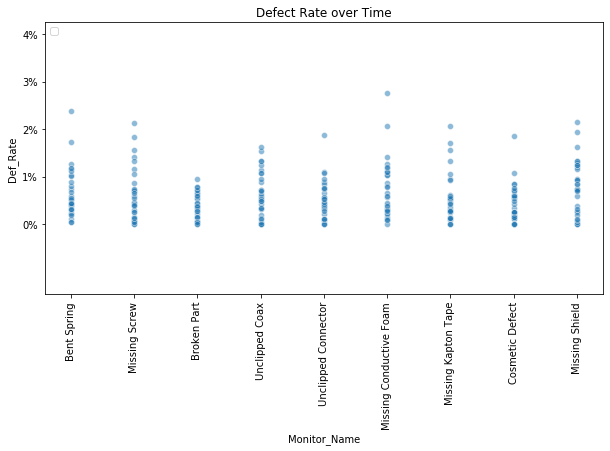

In [0]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Monitor_Name', y='Def_Rate', alpha=0.5, data=APM_data)


plt.title('Defect Rate over Time')
plt.legend(loc='upper left')
plt.xticks(rotation=90)
plt.yticks([0.0, 0.01, 0.02, 0.03, 0.04], ['0%', '1%', '2%', '3%', '4%'])
plt.show()